In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv("Titanic-Dataset.csv")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Dropping the "Cabin" column from the dataframe
data = data.drop(columns='Cabin', axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [8]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [9]:
data.duplicated().sum()

0

In [10]:
data.isnull().sum().sort_values(ascending=False)*100/len(data)

Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [11]:
# Replacing the missing vlaues in "Age" column with mean 
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [12]:
# Finding the mode value of "Embarkked" Column 
print(data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [13]:
print(data['Embarked'].mode()[0]) # 0 is the index

S


In [14]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [15]:
# Getting statistical measures about the data (It's not useful while handling categorical column)
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [17]:
data.describe(include='O')

,Name,Sex,Ticket,Embarked
count,891,891,891,889
unique,891,2,681,3
top,"Braund, Mr. Owen Harris",male,347082,S
freq,1,577,7,644


In [18]:

data = data['Sex'].value_counts()
data

male      577
female    314
Name: Sex, dtype: int64

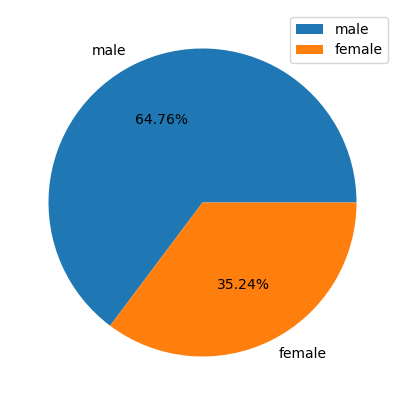

In [19]:
# Plotting Percantage Distribution of Sex Column
plt.figure(figsize=(5,5))
plt.pie(data.values,labels=data.index,autopct='%.2f%%')
plt.legend()
plt.show()

In [20]:
sns.set() 

<AxesSubplot: xlabel='Survived', ylabel='count'>

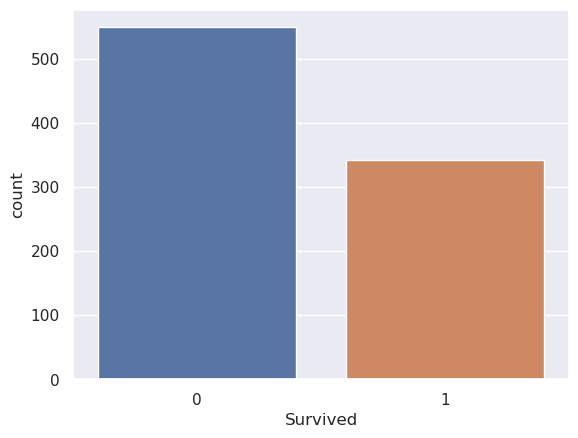

In [21]:
import pandas as pd 
import seaborn as sns 

# DataFrame Load
data = pd.read_csv("Titanic-Dataset.csv")

# Dropping the "Cabin" column from the dataframe
data = data.drop(columns='Cabin', axis=1)

# Replacing the missing values in "Age" column with mean 
data['Age'].fillna(data['Age'].mean(), inplace=True)

# Replacing the missing values in "Embarked" column with the mode value
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Converting Categorical Columns 
data.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

# Count plot for Survived Column
sns.countplot(x='Survived', data=data)

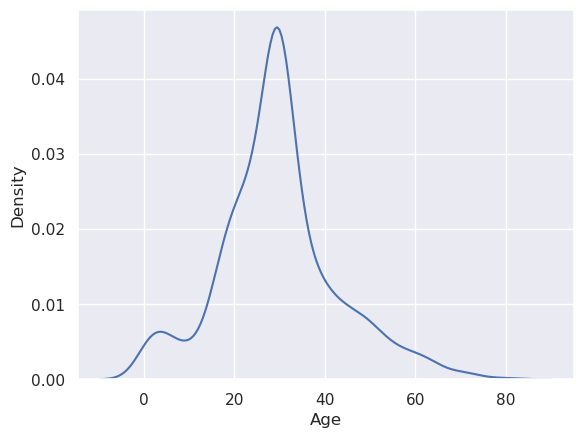

In [22]:
# Age Distribution
sns.kdeplot(x=data['Age'])
plt.show()


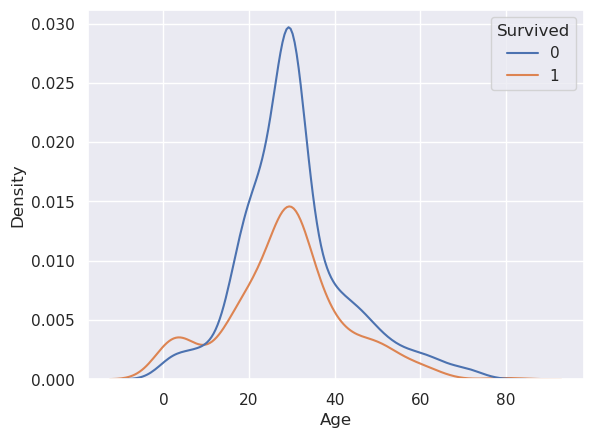

In [23]:
# Showinf Distribution of Age Survived Wise
sns.kdeplot(x=data['Age'],hue=data['Survived'])
plt.show()

In [24]:
data['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

<AxesSubplot: xlabel='Sex', ylabel='count'>

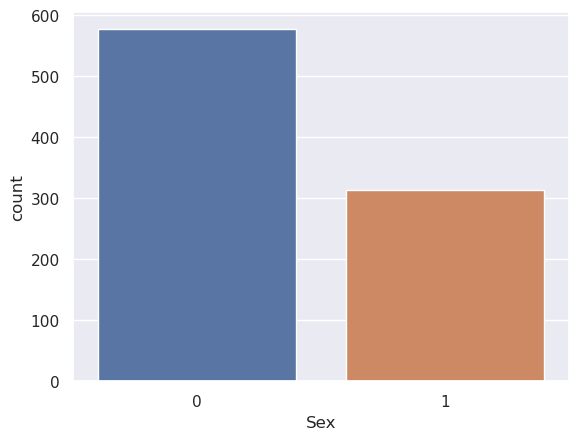

In [25]:
sns.countplot(x='Sex', data=data)

<AxesSubplot: xlabel='Sex', ylabel='count'>

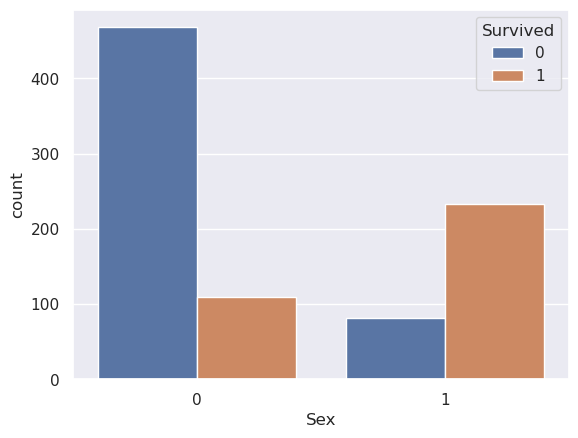

In [26]:
# Number of survivors by Gender wise
sns.countplot(x="Sex", hue="Survived", data=data)

<AxesSubplot: xlabel='Pclass', ylabel='count'>

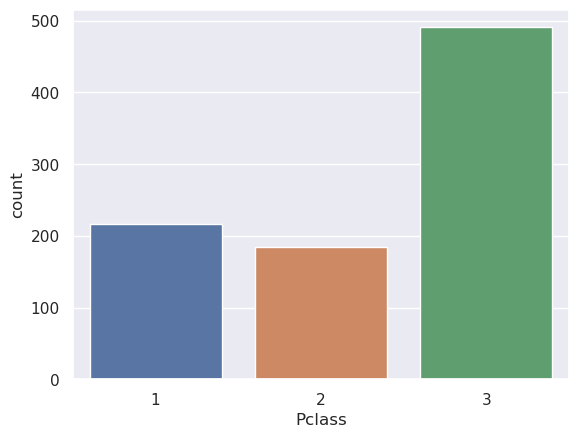

In [27]:
# Creating a Count plot for Pclass Column 
sns.countplot(x="Pclass", data=data)


<AxesSubplot: xlabel='Pclass', ylabel='count'>

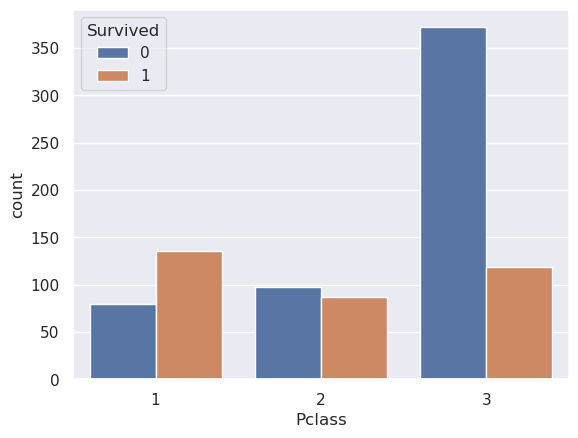

In [28]:
# Number of Survivers by Pclass wise 
sns.countplot(x="Pclass", hue="Survived", data=data)

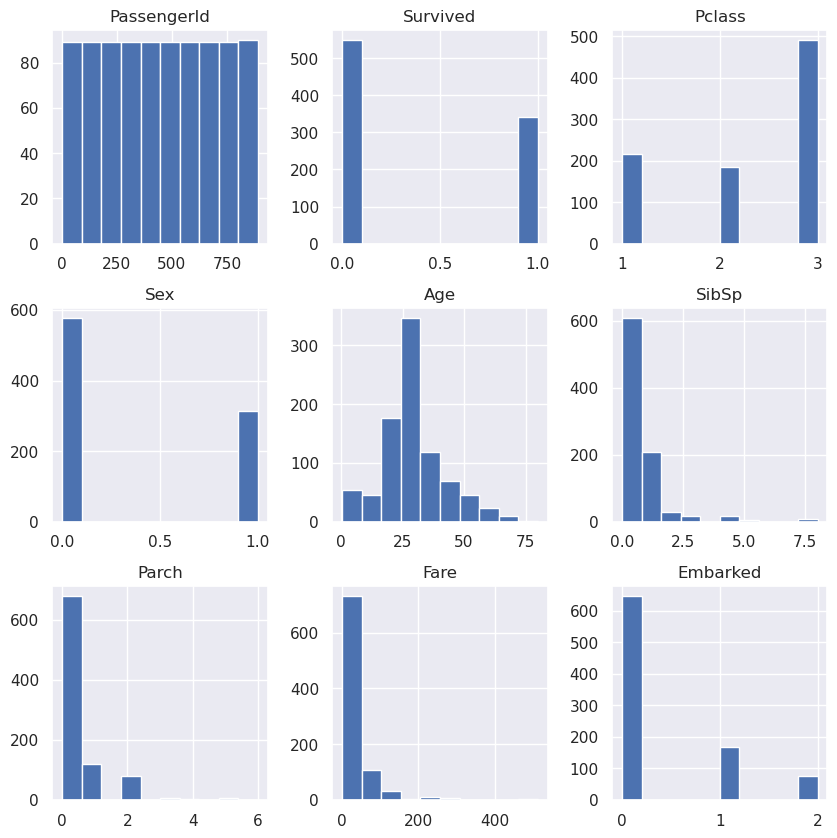

In [29]:
# Plotting Histplot for Dataset
data.hist(figsize=(10,10))
plt.show()

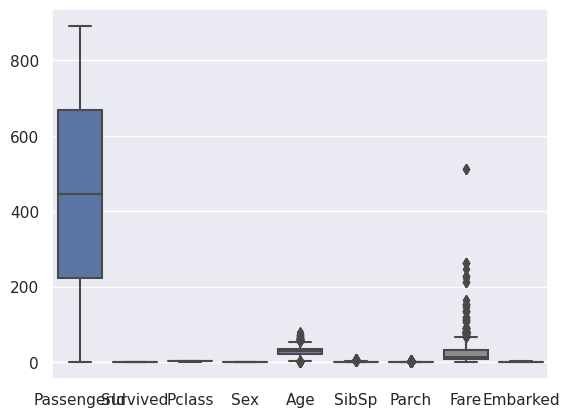

In [30]:
# Plotting Boxplot for dataset
# Checking for outliers
sns.boxplot(data)
plt.show()

In [31]:
data["Embarked"].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [32]:
# Converting Categorical Columns 
data.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

In [33]:
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [34]:
X = data.drop(columns=["PassengerId", "Name", "Ticket", "Survived"], axis=1)
Y = data['Survived']


In [35]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [36]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [38]:
print(X.shape, X_train.shape, X_test.shape)


(891, 7) (712, 7) (179, 7)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [40]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [41]:
model_prediction = model.predict(X_test)

In [42]:
accuracy_score(model_prediction, Y_test)

0.7821229050279329

In [43]:
confusion_matrix(Y_test, model_prediction)

array([[91,  9],
       [30, 49]])

In [44]:
results = pd.DataFrame({
    'Model': ['Logistic Regression'], 
    'Score': [0.78]
})

results

,Model,Score
0,Logistic Regression,0.78


In [45]:
model_prediction

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0])

In [46]:
#To save the model in a pkl file. 

import pickle as pkl

pkl.dump(model, open('model.pkl', 'wb'))

In [47]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [48]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [49]:
X_train.iloc[0,:]

Pclass       1.0000
Sex          0.0000
Age         40.0000
SibSp        0.0000
Parch        0.0000
Fare        27.7208
Embarked     1.0000
Name: 30, dtype: float64

In [50]:
a = list(X_train.iloc[0,:])
a = np.array(a)

In [51]:
ypred = model.predict(a.reshape(-1, 7))
ypred 

array([0])

In [52]:
Y_train[0]

0

In [53]:
loaded_model = pkl.load(open('model.pkl', 'rb'))

In [54]:
type(loaded_model)

sklearn.linear_model._logistic.LogisticRegression

In [55]:
ypred = loaded_model.predict(a.reshape(-1,7))
ypred

array([0])

In [56]:
import pickle
import streamlit as st  
import numpy as np 

model_file = pickle.load(open('model.pkl','rb'))

def pred_output(user_input): 
    model_input = np.array(user_input)
    ypred = model_file.predict(model_input.reshape(-1,7))
    return ypred[0]


def main(): 
    st.title("Titanic Classification - rubangino.in")

    # Input Variables 
    passenger_class = st.text_input("Enter the passenger class: (1/2/3)")

    sex = st.text_input("Enter your sex (Male/Female): ")
    if sex == "Male" or sex == "male": 
        sex = 0
    elif sex == "Female" or sex == "female": 
        sex = 1
    else: 
        st.error('Invalid Input!', icon="🚨")

    # st.success(sex)

    age = st.text_input("Enter their age: ")

    sibsp = st.text_input("Enter their Siblings: ")

    parch = st.text_input("Enter their parch: ")

    fare = st.text_input("Enter their ticket Fare: ")

    embarked = st.text_input("Enter their Port of Embarked: (C=Cherbourg | Q=Queentown | S=Southampton) ")
    if embarked == "C" or embarked == "c": 
        embarked = 1
    elif embarked == "S" or embarked == "s": 
        embarked = 0
    elif embarked == "Q" or embarked == "q": 
        embarked = 2
    else: 
        st.error("Invalid Input!", icon="🚨")

    # Button to predict
    if st.button('Predict'): 
        user_input = [passenger_class, sex, age, sibsp, parch, fare, embarked]
        make_prediction = pred_output(user_input)  

        if make_prediction == 0: 
            make_prediction = "Not Survived :("
        elif make_prediction == 1: 
            make_prediction = "Survived :)"

        st.success(make_prediction)

if __name__ == '__main__':  
    main()
    # SEX - Male=0 Female=1
# Embarked - C=Cherbourg Q=Queentown S=Southampton

2024-03-13 17:22:48.798 
  command:

    streamlit run /opt/conda/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [57]:
get_ipython().system('pip install streamlit') 